# Juan Diego Florez Vera
## codigo: 1007308867
# El modelo de Ising

El modelo Ising es un modelo teórico de un imán. La magnetización de un material magnético se compone de la combinación de muchos dipolos magnéticos pequeños a lo largo del material. Si estos dipolos apuntan en direcciones aleatorias, entonces la magnetización general del sistema será cercana a cero, pero si se alinean de modo que todos o la mayoría de ellos apunten en la misma dirección, entonces el sistema puede adquirir un momento magnético macroscópico: se magnetiza. El modelo de Ising es un modelo de este proceso en el que los momentos individuales están representados por dipolos o" espines " dispuestos en una cuadrícula o celosía:
![spines](Spines.png)

En este caso estamos utilizando una celosía cuadrada en dos dimensiones, aunque el modelo se puede definir en principio para cualquier celosía en cualquier número de dimensiones.
Los giros en sí, en este modelo simple, están restringidos a apuntar en solo dos direcciones, hacia arriba y hacia abajo. Matemáticamente, los espines están representados por las variables $s_i = \pm1$ en los puntos de la red, +1 para los giros que apuntan hacia arriba y -1 para los que apuntan hacia abajo. Los dipolos en imanes reales generalmente pueden apuntar en cualquier dirección espacial, no solo hacia arriba o hacia abajo, pero el modelo Ising, con su restricción a solo las dos direcciones, captura gran parte de la física importante a la vez que es significativamente más simple de entender.
Otra característica importante de muchos materiales magnéticos es que los dipolos individuales en el material pueden interactuar magnéticamente de tal manera que es energéticamente favorable para ellos alinearse en la misma dirección. La energía potencial magnética debida a la interacción de dos dipolos es proporcional a su producto escalar, pero en el modelo de Ising esto se simplifica a solo el producto $s_is_j$, para los espines en los sitios i y j de la red, ya que los espines son escalares unidimensionales, no vectores. Entonces la energía real de interacción es $-Js_is_j$, donde J es una constante de interacción positiva. El signo menos asegura que las interacciones son ferromagnéticas, lo que significa que la energía es menor cuando los dipolos están alineados. Una interacción ferromagnética implica que el material se magnetizará si se le da la oportunidad.
(En algunos materiales, la interacción tiene el signo opuesto, de modo que los dipolos prefieren estar desalineados. Se dice que dicho material es antiferromagnético, pero no veremos el caso antiferromagnético aquí.)

Normalmente se supone que los espines interactúan solo con aquellos que están inmediatamente adyacentes a ellos en la red, lo que da una energía total para todo el sistema igual a

$$
E=-J \sum_{(ij)} s_is_j
$$

donde la notación (ij) indica una suma sobre los pares i, j que son adyacentes en la red.
En la celosía cuadrada que usamos en este ejercicio, cada giro tiene cuatro vecinos adyacentes con los que interactúa, excepto los giros en los bordes de la celosía, que tienen dos o tres vecinos.

Escriba un programa para realizar una simulación Monte Carlo de cadena de Markov del modelo de Ising en la red cuadrada para un sistema de 20 × 20 Spines. Deberá configurar variables para mantener el valor ±1 de la columna vertebral en cada sitio de celosía, probablemente utilizando una matriz de enteros bidimensional, y luego seguir los siguientes pasos.

a) Primero escriba una función para calcular la energía total del sistema, como se indica en la ecuación anterior. Es decir, para una matriz dada de valores de los giros, revise cada par de giros adyacentes y sume las contribuciones $s_is_j$ de todos ellos, luego multiplique por $- J$. Pista 1: Cada par único de giros adyacentes surge solo una vez en la suma. Por lo tanto, hay un término $- JS_1 S_2$ si los espines 1 y 2 son adyacentes entre sí, pero tampoco necesita un término $- JS_2S_1$. Sugerencia 2: Para que su programa final se ejecute en un tiempo razonable, le resultará útil si puede encontrar una manera de calcular la energía utilizando la capacidad de Python para hacer aritmética con matrices completas a la vez. Si realiza el cálculo paso a paso, su programa será significativamente más lento.

In [1]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import matplotlib as mp
import matplotlib.animation as animation
import time
def energia(matrix,J):
    tam=np.shape(matrix)[0]
    MdeColum=matrix[0:tam-1,:]*matrix[1:,:]
    MdeFila=matrix[:,0:tam-1]*matrix[:,1:]
    return(-J*(sum(sum(MdeColum))+sum(sum(MdeFila))))

b) Ahora use su función como base para una simulación de estilo Metrópolis del modelo de Ising con J = 1 y temperatura T = 1 en unidades donde la constante de Boltzmann $K_B$ también es 1. Inicialmente, establezca las variables de giro aleatoriamente en $\pm=1$, de modo que, en promedio, aproximadamente la mitad de ellas estén hacia arriba y la otra mitad hacia abajo, lo que da una magnetización total de aproximadamente cero. Luego, elija un giro al azar, gírelo y calcule la nueva energía después de voltearlo y, por lo tanto, también el cambio en la energía como resultado del giro. A continuación, decida si acepta la inversión utilizando la fórmula de aceptación de Metrópolis, Ec. (10.60). Si el movimiento es rechazado, tendrás que devolver el giro a donde estaba. De lo contrario, mantienes el giro invertido. Ahora repite este proceso para muchos movimientos.

Ecuación de aceptación de probabilidad de Metrópolis

$$
p_a=\left\{\begin{matrix}
1 & si, E_j \leq E_i \\ 
e^{-\beta (E_j-E_i))} & si, E_j > E_i 
\end{matrix}\right.
$$

c) Hacer un gráfico de la magnetización total $M=\sum_i s_i$ del sistema en función del tiempo para un millón de pasos de Monte Carlo. Debería ver que el sistema desarrolla una "magnetización espontánea", un valor distinto de cero de la magnetización general.
Sugerencia: Mientras trabajas en tu programa, haz series más cortas, de tal vez diez mil pasos a la vez. Una vez que lo tenga funcionando correctamente, realice una ejecución más larga de un millón de pasos para obtener los resultados finales.

In [356]:
N=20 #tamaño de la matrix
s=np.ones((N,N),int) #matriz
Stiempo=np.zeros(((N,N,1)))
J=1
T=1
Kᵦ=1
Np=800000 #numero de pasos
β=1/(Kᵦ*T)
#preparamos la matriz con estados aleatorios
for i in range(0,N):
	for j in range(0,N):
		if rn.random()>0.5:
			s[i,j]=-1
Stiempo[:,:,0]=s
s = np.expand_dims(s, axis=2)
Mgra=[sum(sum(s[:,:,0]))] #magnetización
E1=energia(s[:,:,0],J)
Egra=[E1]
inicio=time.time()
for pasos in range(0,Np):
    #elejimos una posición al azar dentro de la matriz i:fila, j:columna
    i=rn.randint(0,N-1)
    j=rn.randint(0,N-1)
    s[i,j,0]*=-1 #cambiamos el el estado del spin
    E2=energia(s[:,:,0],J) #calculamos la energia despues del giro
    ΔE=E2-E1 # calculamos la diferencia de energia
    # ΔE<0 Decae la energia a un valor minimo por lo que se acepta
    if ΔE<0:
        E1=E2 #aceptamos el cambio
        Egra.append(E1)
        Mgra.append(sum(sum(s[:,:,0]))) #la agragamos a la magnetización
        Stiempo = np.append(Stiempo,s, axis=2) # agregamos al tensor Stiempo
    else:
        if rn.random()<np.exp(-β*ΔE):
            E1=E2 #aceptamos el cambio
            Egra.append(E1)
            Mgra.append(sum(sum(s[:,:,0]))) #la agragamos a la magnetización
            Stiempo = np.append(Stiempo,s, axis=2) # agregamos al tensor Stiempo
        else: #rechazamos el cambio
            s[i,j,0]*=-1 #volvemos a camabiar el estado, no hubo cambios
fin=time.time()
print("tiempo de ejecución: ",fin-inicio,"seg")

tiempo de ejecución:  51.29609942436218 seg


d) Ejecute su programa varias veces y observe el signo de la magnetización que se desarrolla, positivo o negativo. Describa lo que encuentre y dé una breve explicación de lo que está sucediendo.

In [99]:
%matplotlib inline

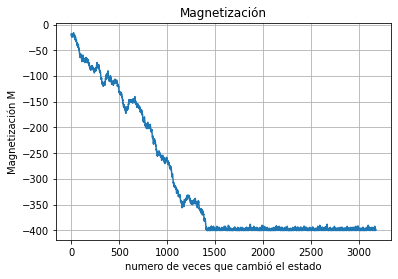

In [43]:
plt.plot(Mgra)
plt.xlabel("numero de veces que cambió el estado")
plt.title("Magnetización")
plt.ylabel("Magnetización M")
plt.grid()
plt.show()

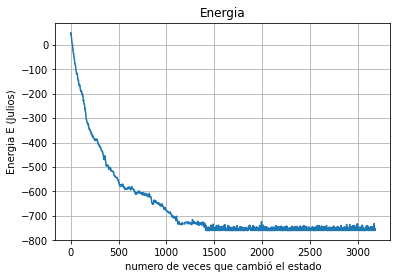

In [44]:
plt.plot(Egra)
plt.xlabel("numero de veces que cambió el estado")
plt.ylabel("Energia E (Julios)")
plt.title("Energia")
plt.grid()
plt.show()

In [359]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [360]:
#simulación
xplot=range(0,len(Mgra))
fig3=plt.figure(figsize=(15,8))
ax=fig3.gca()
colormap = mp.colors.ListedColormap(["red","green"])
def puntoapunto(i):
    ax=plt.subplot(1,2,1)
    ax.clear()
    plt.title("M={} E={}".format(Mgra[i],Egra[i]))
    plt.plot(xplot,Mgra,label="M",color="blue")
    plt.plot(xplot,Egra,label="E",color="black")
    plt.xlabel("numero de veces que cambió el estado")
    plt.ylabel("Magnetización M y Eenergia E")
    plt.grid()
    plt.legend()
    plt.plot([xplot[i],xplot[i]],[min(Egra),max(Egra)],color="green")
    
    ax=plt.subplot(1,2,2)
    ax.clear()
    plt.title("estados de los spines,M={}".format(Mgra[i]))
    plt.xticks(range(0,N,1))
    plt.yticks(range(0,N,1))
    if Mgra[i]==max(Mgra):
        plt.imshow(Stiempo[:,:,i],cmap=mp.colors.ListedColormap(["green"]))
    else:
        plt.imshow(Stiempo[:,:,i],cmap=colormap)
ani=animation.FuncAnimation(fig3, puntoapunto, len(Mgra),interval=1)
# ani.save("Gradiente_de_laplaca_triangular.mp4", writer="ffmpeg")
plt.show()

Rta:
Vemos que la magnetización va a tener un valor maximo o minimo que es cuando todos los spines están alineados ya sea hacia arriba o hacia abajo, esto favorece a la energia del sistema ya que este siempre va a tender a su menor estado energetico esto es todos los espines apuntando a un solo lugar.<br>
<br>
e) Haga una segunda versión de su programa que produzca una animación del sistema usando el paquete visual, con esferas o cuadrados de dos colores, en una cuadrícula regular, para representar los spines hacia arriba y hacia abajo. Ejecútelo con temperatura $T = 1$ y observe el comportamiento del sistema. A continuación, se hace funcionar dos veces más a temperaturas $T = 2$ y $T = 3$. Explique brevemente lo que ve en sus tres carreras. ¿Cómo y por qué cambia el comportamiento del sistema a medida que aumenta la temperatura?

cada Calulo de las temperaturas se demoraban 35 minutos en Julia

![](Calculando_Julia_T=2_positivoT.png)

In [98]:
#cargar todos los datos

def reshapemy(matri,dim):
    fila=matri.shape[0]
    columna=matri.shape[1]
    if (columna/dim[1]==dim[2]):
        tameje3D=int(columna/dim[1])
        matriTran=np.zeros((fila,dim[1],tameje3D))
        for i in range(0,tameje3D):
            matriTran[:,:,i]=matri[:,i*int(dim[1]):int(dim[1])+i*int(dim[1])]
    else:
        print("error de dimensión")
    return(matriTran)

# para T=1 M=+
MgraT1p=np.loadtxt("Mgra_Magnetizacion_T=1_julia_Positivo.txt")
EgraT1p=np.loadtxt("Egra_Magnetizacion_T=1_julia_Positivo.txt")
Stiempo_cargar = np.loadtxt("Stiempo_Magnetizacion_T=1_julia_Positivo.txt")
StiempoT1p = reshapemy(Stiempo_cargar,(Stiempo_cargar.shape[0],Stiempo_cargar.shape[0],len(MgraT1p)))
xplotT1p=range(0,len(MgraT1p))
# para T=1 M=-
MgraT1n=np.loadtxt("Mgra_Magnetizacion_T=1_julia_Negativo.txt")
EgraT1n=np.loadtxt("Egra_Magnetizacion_T=1_julia_Negativo.txt")
Stiempo_cargar = np.loadtxt("Stiempo_Magnetizacion_T=1_julia_Negativo.txt")
StiempoT1n = reshapemy(Stiempo_cargar,(Stiempo_cargar.shape[0],Stiempo_cargar.shape[0],len(MgraT1n)))
xplotT1n=range(0,len(MgraT1n))
# para T=2 M=-
MgraT2=np.loadtxt("Mgra_Magnetizacion_T=2_julia_Negativo.txt")
EgraT2=np.loadtxt("Egra_Magnetizacion_T=2_julia_Negativo.txt")
Stiempo_cargar = np.loadtxt("Stiempo_Magnetizacion_T=2_julia_Negativo.txt")
StiempoT2 = reshapemy(Stiempo_cargar,(Stiempo_cargar.shape[0],Stiempo_cargar.shape[0],len(MgraT2)))
xplotT2=range(0,len(MgraT2))
# para T=3 M=-
MgraT3=np.loadtxt("Mgra_Magnetizacion_T=3_julia_Negativo.txt")
EgraT3=np.loadtxt("Egra_Magnetizacion_T=3_julia_Negativo.txt")
Stiempo_cargar = np.loadtxt("Stiempo_Magnetizacion_T=3_julia_Negativo.txt")
StiempoT3 = reshapemy(Stiempo_cargar,(Stiempo_cargar.shape[0],Stiempo_cargar.shape[0],len(MgraT3)))
xplotT3=range(0,len(MgraT3))
# para T=2 M=max
MgraT2p=np.loadtxt("Mgra_Magnetizacion_T=2_julia_PositivoT.txt")
EgraT2p=np.loadtxt("Egra_Magnetizacion_T=2_julia_PositivoT.txt")
Stiempo_cargar = np.loadtxt("Stiempo_Magnetizacion_T=2_julia_PositivoT.txt")
StiempoT2p = reshapemy(Stiempo_cargar,(Stiempo_cargar.shape[0],Stiempo_cargar.shape[0],len(MgraT2p)))
xplotT2p=range(0,len(MgraT2p))
# para T=3 M=max
MgraT3p=np.loadtxt("Mgra_Magnetizacion_T=3_julia_PositivoT.txt")
EgraT3p=np.loadtxt("Egra_Magnetizacion_T=3_julia_PositivoT.txt")
Stiempo_cargar = np.loadtxt("Stiempo_Magnetizacion_T=3_julia_PositivoT.txt")
StiempoT3p = reshapemy(Stiempo_cargar,(Stiempo_cargar.shape[0],Stiempo_cargar.shape[0],len(MgraT3p)))
xplotT3p=range(0,len(MgraT3p))

In [105]:
#graficar los datos
ax=plt.subplot(2,2,1)
plt.title("T=1 M=+1")
plt.plot(xplotT1p,MgraT1p,label="M",color="blue")
plt.plot(xplotT1p,EgraT1p,label="E",color="black")
# plt.xlabel("numero de veces que cambió el estado")
plt.ylabel("Magnetización M y Eenergia E")
plt.grid()
plt.legend()
plt.show()
# plt.savefig("grafica_T=1_M=+1.jpg")
    
ax=plt.subplot(2,2,2)
plt.title("T=1 M=-1")
plt.plot(xplotT1n,MgraT1n,label="M",color="blue")
plt.plot(xplotT1n,EgraT1n,label="E",color="black")
# plt.xlabel("numero de veces que cambió el estado")
plt.ylabel("Magnetización M y Eenergia E")
plt.grid()
plt.legend()
plt.show()
# plt.savefig("grafica_T=1_M=-1.jpg")

ax=plt.subplot(2,2,3)
plt.title("T=2 M=-1")
plt.plot(xplotT2,MgraT2,label="M",color="blue")
plt.plot(xplotT2,EgraT2,label="E",color="black")
plt.xlabel("numero de veces que cambió el estado")
plt.ylabel("Magnetización M y Eenergia E")
plt.grid()
plt.legend()
plt.show()
# plt.savefig("grafica_T=2_M=-1.jpg")

ax=plt.subplot(2,2,4)
plt.title("T=3 M=-1")
plt.plot(xplotT3,MgraT3,label="M",color="blue")
plt.plot(xplotT3,EgraT3,label="E",color="black")
plt.xlabel("numero de veces que cambió el estado")
plt.ylabel("Magnetización M y Eenergia E")
plt.grid()
plt.legend()
plt.show()
# plt.savefig("grafica_T=3_M=-1.jpg")

![](Graficas_de_los_Diferentes_caso.png)

In [106]:
ax=plt.subplot(1,2,1)
plt.title("T=2 M=Max")
plt.plot(xplotT2p,MgraT2p,label="M",color="blue")
plt.plot(xplotT2p,EgraT2p,label="E",color="black")
plt.xlabel("numero de veces que cambió el estado")
plt.ylabel("Magnetización M y Eenergia E")
plt.grid()
plt.legend()
plt.show()

ax=plt.subplot(1,2,2)
plt.title("T=3 M=Max")
plt.plot(xplotT3p,MgraT3p,label="M",color="blue")
plt.plot(xplotT3p,EgraT3p,label="E",color="black")
plt.xlabel("numero de veces que cambió el estado")
plt.ylabel("Magnetización M y Eenergia E")
plt.grid()
plt.legend()
plt.show()

![](Grafica_Hipotesis.png)

Rta:
Vemos que entre mayor temperatura los spines van a estar cambiando mas aleatoriamente y es mas dificil que se defina una orientación privilegiada, por lo que podemos concluir que entre mayor temperatura el material pierde cualquier estado de magnetización, como lo pudimos observar anteriormente cuando iniciamos con una magnetización de +400 y terminamos con una magnetización de cercanos a 0 lo que significa que el estado como tiene mayor energia por el echo de que tiene mayor temperatura, va a tender a un estado de mayor energia en este caso paso de un estado de menor energia a uno de mayor energia.

# trabajar con Datos

In [210]:
#guardar datos de la simulación
Stiempo_redimensionar=Stiempo.reshape(Stiempo.shape[0], -1)
np.savetxt("Stiempo_Magnetizacion_negativa.txt", Stiempo_redimensionar)
np.savetxt("Mgra_Magnetizacion_negativa.txt", Mgra)
np.savetxt("Egra_Magnetizacion_negativa.txt", Egra)

In [11]:
#cargar los datos
Mgra=np.loadtxt("Mgra_Magnetizacion_T=3_julia_PositivoT.txt")
Egra=np.loadtxt("Egra_Magnetizacion_T=3_julia_PositivoT.txt")
Stiempo_cargar = np.loadtxt("Stiempo_Magnetizacion_T=3_julia_PositivoT.txt")
def reshapemy(matri,dim):
    fila=matri.shape[0]
    columna=matri.shape[1]
    if (columna/dim[1]==dim[2]):
        tameje3D=int(columna/dim[1])
        matriTran=np.zeros((fila,dim[1],tameje3D))
        for i in range(0,tameje3D):
            matriTran[:,:,i]=matri[:,i*int(dim[1]):int(dim[1])+i*int(dim[1])]
    else:
        print("error de dimensión")
    return(matriTran)
Stiempo = reshapemy(Stiempo_cargar,(Stiempo_cargar.shape[0],Stiempo_cargar.shape[0],len(Mgra)))

In [4]:
%matplotlib inline

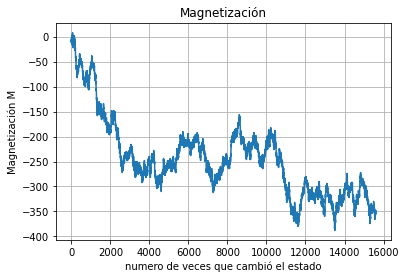

In [5]:
plt.plot(Mgra)
plt.xlabel("numero de veces que cambió el estado")
plt.ylabel("Magnetización M")
plt.title("Magnetización")
plt.grid()
plt.show()

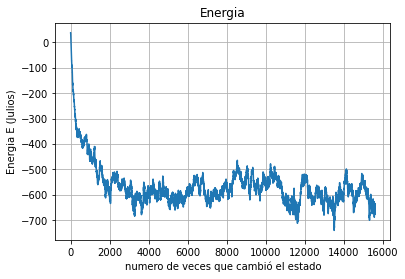

In [6]:
plt.plot(Egra)
plt.xlabel("numero de veces que cambió el estado")
plt.ylabel("Energia E (Julios)")
plt.title("Energia")
plt.grid()
plt.show()

In [4]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [13]:
#simulación cuadro
N=20
xplot=range(0,len(Mgra))
fig3=plt.figure(figsize=(15,8))
ax=fig3.gca()
fig3.suptitle('T=2')
colormap = mp.colors.ListedColormap(["black","yellow"])
def puntoapunto(i):
    ax=plt.subplot(1,2,1)
    ax.clear()
    plt.title("M={} E={}".format(Mgra[i],Egra[i]))
    plt.plot(xplot,Mgra,label="M",color="blue")
    plt.plot(xplot,Egra,label="E",color="black")
    plt.xlabel("numero de veces que cambió el estado")
    plt.ylabel("Magnetización M y Eenergia E")
    plt.grid()
    plt.legend()
    plt.plot([xplot[i],xplot[i]],[min(Egra),max(Mgra)],color="green")
    
    ax=plt.subplot(1,2,2)
    ax.clear()
    plt.title("estados de los spines,M={}".format(Mgra[i]))
    plt.xticks(range(0,N,1))
    plt.yticks(range(0,N,1))
    if Mgra[i]==max(Mgra):
        plt.imshow(Stiempo[:,:,i],cmap=mp.colors.ListedColormap(["yellow"]))
    else:
        plt.imshow(Stiempo[:,:,i],cmap=colormap)
ani=animation.FuncAnimation(fig3, puntoapunto, len(Mgra),interval=15)
ani.save("Spines_Magnetizacion_T=3_PositivoT.mp4", writer="ffmpeg")
plt.show()

In [13]:
#simulación flechas
N=20
xrejilla=[0]*20
yrejilla=[1]*20
X,Y=np.meshgrid(xrejilla,yrejilla)
xplot=range(0,len(Mgra))
fig3=plt.figure(figsize=(15,8))
ax=fig3.gca()
fig3.suptitle('T=3 Positivo')
colormap = mp.colors.ListedColormap(["red","green"])
def puntoapunto(i):
    ax=plt.subplot(1,2,1)
    ax.clear()
    plt.title("M={} E={}".format(Mgra[i],Egra[i]))
    plt.plot(xplot,Mgra,label="M",color="blue")
    plt.plot(xplot,Egra,label="E",color="black")
    plt.xlabel("numero de veces que cambió el estado")
    plt.ylabel("Magnetización M y Eenergia E")
    plt.grid()
    plt.legend()
    plt.plot([xplot[i],xplot[i]],[min(Egra),max(Mgra)],color="green")
    
    ax=plt.subplot(1,2,2)
    ax.clear()
    plt.title("estados de los spines,M={}".format(Mgra[i]))
    plt.xticks(range(0,N,1))
    plt.yticks(range(0,N,1))
    if Mgra[i]==max(Mgra):
        ax.quiver(X,Stiempo[:,:,i],Stiempo[:,:,i],cmap=mp.colors.ListedColormap(["green"]))
    else:
        ax.quiver(X,Stiempo[:,:,i],Stiempo[:,:,i],cmap=colormap)
ani=animation.FuncAnimation(fig3, puntoapunto, len(Mgra),interval=15)
ani.save("Spines_Magnetizacion_T=3_PositivoTVect.mp4", writer="ffmpeg")
plt.show()

# mostrar un dato en especifico

In [68]:
#cuadrada
fig3=plt.figure(figsize=(15,8))
ax=fig3.gca()
ndedato=int(input("ingrese el numero de estado:"))
i=xplot.index(ndedato)
colormap = mp.colors.ListedColormap(["red","green"])
ax=plt.subplot(1,2,1)
plt.title("M={} E={}".format(Mgra[i],Egra[i]))
plt.plot(xplot,Mgra,label="M",color="blue")
plt.plot(xplot,Egra,label="E",color="black")
plt.xlabel("numero de veces que cambió el estado")
plt.ylabel("Magnetización M y Eenergia E")
plt.grid()
plt.legend()
plt.plot([xplot[i],xplot[i]],[min(Egra),max(Egra)],color="green")
plt.show()

ax=plt.subplot(1,2,2)
plt.title("estados de los spines,M={}".format(Mgra[i]))
plt.xticks(range(0,N,1))
plt.yticks(range(0,N,1))
if Mgra[i]==max(Mgra):
    plt.imshow(Stiempo[:,:,i],cmap=mp.colors.ListedColormap(["yellow"]))
    plt.show()
else:
    plt.imshow(Stiempo[:,:,i],cmap=colormap)
    plt.show()

ingrese el numero de estado:40000


In [93]:
#vectorial
xrejilla=[0]*20
yrejilla=[1]*20
X,Y=np.meshgrid(xrejilla,yrejilla)
fig3=plt.figure(figsize=(15,8))
ax=fig3.gca()
ndedato=int(input("ingrese el numero de estado:"))
i=xplot.index(ndedato)
colormap = mp.colors.ListedColormap(["red","green"])
ax=plt.subplot(1,2,1)
plt.title("M={} E={}".format(Mgra[i],Egra[i]))
plt.plot(xplot,Mgra,label="M",color="blue")
plt.plot(xplot,Egra,label="E",color="black")
plt.xlabel("numero de veces que cambió el estado")
plt.ylabel("Magnetización M y Eenergia E")
plt.grid()
plt.legend()
plt.plot([xplot[i],xplot[i]],[min(Egra),max(Egra)],color="green")
plt.show()

ax=plt.subplot(1,2,2)
plt.title("estados de los spines,M={}".format(Mgra[i]))
plt.xticks(range(0,N,1))
plt.yticks(range(0,N,1))
if Mgra[i]==max(Mgra):
    ax.quiver(X,Stiempo[:,:,i],Stiempo[:,:,i],cmap=mp.colors.ListedColormap(["green"]))
    plt.show()
else:
    ax.quiver(X,Stiempo[:,:,i],Stiempo[:,:,i],cmap=colormap)
    plt.show()

ingrese el numero de estado:0


# Codigo en Julia

~~~julia
using DelimitedFiles
function energia(matrix,J)
    tam=size(matrix)[1]
    MdeColum=matrix[1:tam-1,1:end].*matrix[2:end,1:end]
    MdeFila=matrix[1:end,1:tam-1].*matrix[1:end,2:end]
    return(-J*(sum(MdeColum)+sum(MdeFila)))
end
N=20
global s=ones((N,N)) #matriz
for i in (1:N)
 	for j in (1:N)
 		if rand()>0.5
 			s[i,j]=-1
         end
     end
end

global suni=copy(s)

J=1
T=3
Kᵦ=1
Np=89000 #numero de pasos
β=1/(Kᵦ*T)

global Mgra=[sum(s)] #magnetización
global E1=energia(s,J)
global Egra=[E1]
@time for pasos in (1:Np)
    #elejimos una posición al azar dentro de la matriz i:fila, j:columna
    i=rand(1:N)
    j=rand(1:N)
    global s[i,j]*=-1 #cambiamos el el estado del spin
    global E2=energia(s,J) #calculamos la energia despues del giro
    global ΔE=E2-E1 # calculamos la diferencia de energia
    # ΔE<0 Decae la energia a un valor minimo por lo que se acepta
    if ΔE<0
        global E1=E2 #aceptamos el cambio
        push!(Egra,E1)
        push!(Mgra,sum(s)) #la agragamos a la magnetización
        global suni = [suni s] # agregamos al tensor Stiempo
    else
        if rand()<exp(-β*ΔE)
            global E1=E2 #aceptamos el cambio
            push!(Egra,E1)
            push!(Mgra,sum(s)) #la agragamos a la magnetización
            global suni = [suni s] # agregamos al tensor Stiempo
        else #rechazamos el cambio
            global s[i,j]*=-1 #volvemos a camabiar el estado, no hubo cambios
        end
    end
    print(pasos,"\r")
end
println("magnetización:",Mgra[end])
println("Energia:",Egra[end]) 
~~~

~~~julia
writedlm("Stiempo_Magnetizacion_T=3_julia_PositivoT.txt",suni)
writedlm("Mgra_Magnetizacion_T=3_julia_PositivoT.txt",Mgra)
writedlm("Egra_Magnetizacion_T=3_julia_PositivoT.txt",Egra)
~~~

In [93]:
%load_ext version_information

%version_information numpy, matplotlib, version_information

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.9.12 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.30.0
OS Windows 10 10.0.19044 SP0
numpy 1.20.3
matplotlib 3.4.0
version_information 1.0.4
Sun Nov 13 23:45:37 2022 Hora est. Pacífico, Sudamérica